In [1]:
import numpy as np
import torch

import pandas as pd

import matplotlib

matplotlib.rcParams["figure.figsize"] = (10, 8)

from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{color}')

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues"

import ternary

In [2]:
parents = ["Al", "Ba", "Si"]
target = "Enthalpy Relative to Elements (meV/atom)"

df = pd.read_csv("../data/AlBaSi.csv")[parents + [target]]
df

,Al,Ba,Si,Enthalpy Relative to Elements (meV/atom)
0,0.000000,0.666667,0.333333,-310.5370
1,0.000000,0.000000,1.000000,-0.0125
2,0.000000,0.500000,0.500000,-422.5390
3,0.000000,0.333333,0.666667,-359.2750
4,0.000000,0.428571,0.571429,-407.0530
...,...,...,...,...
87,0.461538,0.538462,0.000000,373.3570
88,0.600000,0.400000,0.000000,400.9760
89,0.000000,0.538462,0.461538,287.5340
90,0.000000,0.125000,0.875000,699.1170


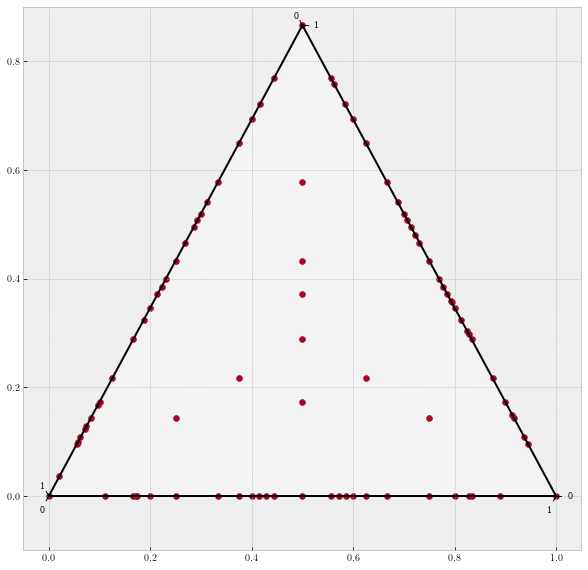

In [29]:
figure, ax = plt.subplots(figsize=(10, 10))
tax = ternary.TernaryAxesSubplot(ax=ax, scale=1)

tax.boundary(linewidth=2.0)

# Plot a few different styles with a legend
tax.scatter(df[parents].values)

tax.ticks(axis="lbr", linewidth=1)

tax.show()

In [13]:
from scipy.interpolate import Rbf

/Users/quannguyen/anaconda3/envs/drew2/lib/python3.9/site-packages/scipy/interpolate/rbf.py:257: LinAlgWarning: Ill-conditioned matrix (rcond=1.86294e-17): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


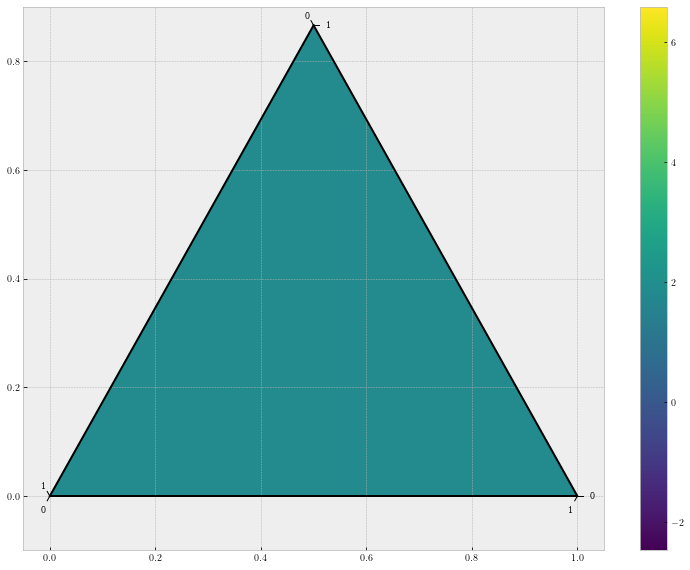

In [23]:
smoother = Rbf(df[parents[0]], df[parents[1]], df[parents[2]], df[target] / 10)
smoothing_function = lambda p: smoother(p[0], p[1], p[2])


figure, ax = plt.subplots(figsize=(13, 10))
tax = ternary.TernaryAxesSubplot(ax=ax, scale=1)

tax.boundary(linewidth=2.0)

tax.heatmapf(smoothing_function, boundary=True, style="triangular")

tax.ticks(axis="lbr", linewidth=1)

tax.show()

In [28]:
ind = 2

smoothing_function(df.iloc[ind, :])

array(-43.35032055)